In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.sparse import diags
from numpy.linalg import inv, norm, solve

# a) Iterative Methods

In [2]:
#Initilization
n_list = [2, 4, 8, 16, 32, 64, 128, 256]
diff = 0.0001
values = [-1, 4, -1]
w = 1.3
Jacobian_times = []
Gauss_Seidel_times = []
t_times= []

Jacobian_errors = []
Gauss_Seidel_errors = []
SOR_errors = []

### 1. Jacobian

In [3]:
def solve_Jacobian_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Jacobian method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Jacobian method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))
    
    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D), (b - np.dot((L + U),X[-1]))))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Jacobian_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Jacobian_times.append(seconds)
    Jacobian_errors.append(error)
    print("\n")

Start Jacobian method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.25 0.25]
iteration 2 = [0.3125 0.3125]
iteration 3 = [0.328125 0.328125]
iteration 4 = [0.33203125 0.33203125]
iteration 5 = [0.33300781 0.33300781]
iteration 6 = [0.33325195 0.33325195]

Final Answer is: [0.33325195 0.33325195]


Start Jacobian method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25 0.25 0.25 0.25]
iteration 2 = [0.3125 0.375  0.375  0.3125]
iteration 3 = [0.34375  0.421875 0.421875 0.34375 ]
iteration 4 = [0.35546875 0.44140625 0.44140625 0.35546875]
iteration 5 = [0.36035156 0.44921875 0.44921875 0.36035156]
iteration 6 = [0.36230469 0.45239258 0.45239258 0.36230469]
iteration 7 = [0.36309814 0.45367432 0.45367432 0.36309814]
iteration 8 = [0.36341858 0.45419312 0.45419312 0.36341858]
iteration 9 = [0.36354828 0.45440292 0.45440292 0.36354828]
iteration 10 = [0.36360073 0.4544878  0.4544878  0.36360073]

Final Answer is: [0.36360073 0.4544878  0.4544878  0.36360073]


Start Jacobia

iteration 13 = [0.36601287 0.46407706 0.49034649 0.49737923 0.49925992 0.4997606
 0.49989328 0.49992758 0.49993637 0.4999384  0.49993888 0.49993895
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896 0.49993896
 0.49993896 0.49993896 0.49993896 0.49993896 0.4

### 2. Gauss–Seidel

In [4]:
def solve_Gauss_Seidel_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Gauss-Seidel method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Gauss-Seidel method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + L), b - np.dot(U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Gauss_Seidel_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Gauss_Seidel_times.append(seconds)
    Gauss_Seidel_errors.append(error)

    print("\n")     

Start Gauss-Seidel method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.25   0.3125]
iteration 2 = [0.328125   0.33203125]
iteration 3 = [0.33300781 0.33325195]
iteration 4 = [0.33331299 0.33332825]

Final Answer is: [0.33331299 0.33332825]


Start Gauss-Seidel method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   0.33203125]
iteration 2 = [0.328125   0.4140625  0.43652344 0.35913086]
iteration 3 = [0.35351562 0.44750977 0.45166016 0.36291504]
iteration 4 = [0.36187744 0.4533844  0.45407486 0.36351871]
iteration 5 = [0.3633461  0.45435524 0.45446849 0.36361712]
iteration 6 = [0.36358881 0.45451432 0.45453286 0.36363322]

Final Answer is: [0.36358881 0.45451432 0.45453286 0.36363322]


Start Gauss-Seidel method for n =  8 

First Guess = [0. 0. 0. 0. 0. 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   0.33203125 0.33300781 0.33325195
 0.33331299 0.33332825]
iteration 2 = [0.328125   0.4140625  0.43652344 0.44238281 0.44390869 0.44

 0.49382716 0.48861883 0.46344522 0.3658613 ]
iteration 5 = [0.36464691 0.46226692 0.48839617 0.49538857 0.49725936 0.49775976
 0.49789357 0.49792934 0.4979389  0.49794146 0.49794214 0.49794232
 0.49794237 0.49794238 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239 0.49794239
 0

### 3. SOR

In [5]:
def solve_SOR_tridiagonal(A, b, w, n, diff):
    """ 
    Solve Ax = b with SOR method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start SOR method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + w * L), w * b + np.dot( (1-w) * D - w * U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]

#Solver for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_SOR_tridiagonal(A, b, w, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    SOR_times.append(seconds)
    SOR_errors.append(error)

    print("\n")     

Start SOR method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.325    0.430625]
iteration 2 = [0.36745312 0.31523477]
iteration 3 = [0.31721536 0.33352456]
iteration 4 = [0.33823087 0.33486767]
iteration 5 = [0.33236273 0.33255759]
iteration 6 = [0.3333724  0.33357875]
iteration 7 = [0.33340138 0.33328182]
iteration 8 = [0.33329618 0.33333671]

Final Answer is: [0.33329618 0.33333671]


Start SOR method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.325      0.430625   0.46495313 0.47610977]
iteration 2 = [0.36745312 0.46634453 0.49181171 0.34200588]
iteration 3 = [0.36632604 0.46399141 0.4394056  0.36520506]
iteration 4 = [0.3658994  0.4475267  0.45731614 0.36406623]
iteration 5 = [0.36067636 0.45658955 0.45451829 0.36349857]
iteration 6 = [0.3651887  0.4544279  0.45447062 0.36365338]
iteration 7 = [0.36313246 0.45439263 0.45452377 0.36362421]
iteration 8 = [0.36373787 0.45461724 0.45457134 0.36364842]
iteration 9 = [0.36362924 0.45453002 0.45453659 0.36362987]

Final

 0.46412305 0.3660314 ]
iteration 8 = [0.36602521 0.46410174 0.49038133 0.49742282 0.49930948 0.49981496
 0.49995039 0.49998669 0.49999642 0.49999904 0.49999974 0.49999993
 0.49999998 0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5

 0.4974325  0.49040165 0.46410383 0.36602432]
iteration 9 = [0.3660255  0.4641017  0.49038107 0.49742258 0.49930936 0.49981493
 0.49995041 0.49998671 0.49999644 0.49999905 0.49999975 0.49999993
 0.49999998 0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5

# b) Comparison

### Time

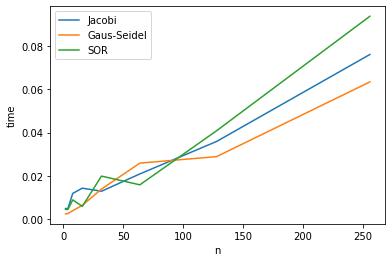

In [6]:
plt.plot(n_list,Jacobian_times, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_times, label = "Gaus-Seidel")
plt.plot(n_list,SOR_times, label = "SOR")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

## Accuaracy

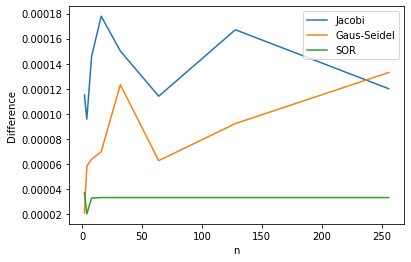

In [7]:
plt.plot(n_list,Jacobian_errors, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_errors, label = "Gaus-Seidel")
plt.plot(n_list,SOR_errors, label = "SOR")
plt.ylabel("Difference")
plt.xlabel("n")
plt.legend()
plt.show()

# LU

### Without Partial Pivoting

In [8]:
def LU(A):
    
    """Find L and U that A = LU
    without pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    for k in range(n-1):
        for i in range(k+1, n):
            if A[k,k] != 0:
                A[i,k] = A[i,k] / A[k,k]
            else:
                print("Failed!")
                break
                
            for j in range(k+1,n):      
                A[i,j] = A[i,j] - A[i,k]*A[k,j]

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
    finish = time.time()  
    return finish - start

lu_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_time.append(LU(A))
    
lu_time

[0.0,
 0.0,
 0.0,
 0.001550912857055664,
 0.009485006332397461,
 0.07092833518981934,
 0.5442936420440674,
 4.291045188903809]

### With Partial Pivoting

In [9]:
def LU_pivot(A):
    
    """Find L and U that A = LU
    with pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    piv = np.arange(0,n)
    
    for k in range(n-1):
        r = np.argmax(abs(A[k:n,k])) + k
        piv[[k, r]] = piv[[r, k]]
        A[[k, r]] = A[[r, k]]
 
        for i in range(k+1, n):          
            A[i, k] = A[i, k] / A[k, k]
            
            for j in range(k+1, n):      
                A[i, j] =  A[i, j] - A[i, k]*A[k, j] 
 

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
                
    finish = time.time()  
    return finish - start

lu_pivot_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_pivot_time.append(LU_pivot(A))
    
lu_pivot_time    

[0.0,
 0.0,
 0.0002956390380859375,
 0.000774383544921875,
 0.006983041763305664,
 0.06068253517150879,
 0.45334744453430176,
 4.360313177108765]

## Comparison

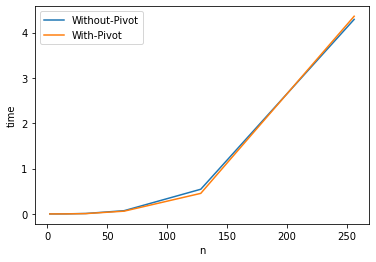

In [11]:
plt.plot(n_list,lu_time, label = "Without-Pivot")
plt.plot(n_list,lu_pivot_time, label = "With-Pivot")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

## Prove O(N ^ 3)

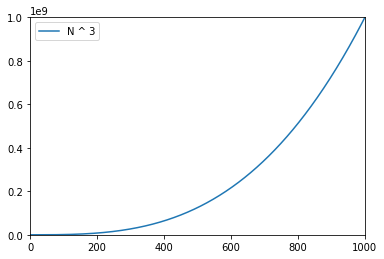

In [12]:
#Compare with Previous Plot
mylist = []
for i in range(1000):
    mylist.append(i ** 3)
plt.plot(list(range(1000)),mylist, label = "N ^ 3")
plt.xlim(0, 1000)
plt.ylim(0, 1000 ** 3)
plt.legend()
plt.show()

In [20]:
Ratio_lu = []
for i in range(3, 7):
    Ratio_lu.append(lu_time[i + 1] / lu_time[i])
Ratio_lu    

[6.1157571099154495, 7.4779428399064924, 7.673853342072976, 7.8836952289007165]

In [22]:
sum(Ratio_lu) / len(Ratio_lu)

7.287812130198909

In [23]:
Ratio_pivot_lu = []
for i in range(3, 7):
    Ratio_pivot_lu.append(lu_pivot_time[i + 1] / lu_pivot_time[i])
Ratio_pivot_lu    

[9.017549261083744, 8.689986001570556, 7.470805945285457, 9.61803850375261]

In [24]:
sum(Ratio_pivot_lu) / len(Ratio_pivot_lu)

8.699094927923092